In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ANN Model For The Mobile Dataset (Classification)

## 1. Load the required libraries and modules

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Load the data and apply pre-processing - In this step, we will process and visualize data which will help us to gain insight into the data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mobile_price.csv')

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 3. Create an array for data features and response/output variable

In [ ]:
X = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [ ]:
y = df['price_range']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(y.values.reshape(-1,1)).toarray()

encoded_Y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

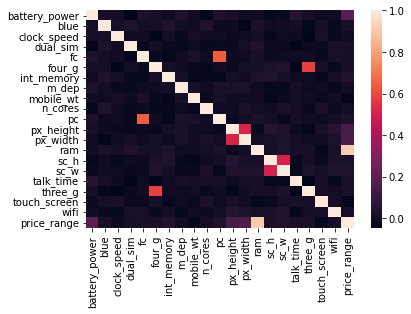

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## 4. Split train, test, validation data

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,encoded_Y, test_size=0.2, random_state=14)

## 5. Define neural network model - We need to specify the number of hidden layers in the neural network and their size, the input and output size.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=20))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

## 6. Define loss function, optimizer and other hyper parameters
## 7. Compile and fit keras model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train=model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
16/16 [==============================] - 1s 7ms/step - loss: 1.5545 - accuracy: 0.7250
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 1.0367 - accuracy: 0.7700
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7659 - accuracy: 0.8000
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7272 - accuracy: 0.7931
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.8112
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.8119
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.8294
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.8213
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.8125
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.8094
Epoch 11/

## 9. Predict the test data and compute evaluation metric

In [ ]:
predictions = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [ ]:
rounded = [round(x[0]) for x in predictions]
print(rounded[:10])
print(y_test[:10])

[0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


## 8. Visualize training, validation loss and accuracy

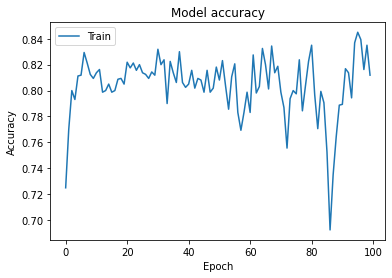

In [ ]:
plt.plot(train.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

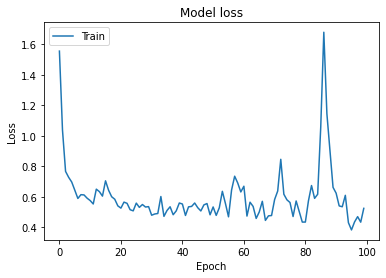

In [ ]:
plt.plot(train.history['loss'])  
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
# plt.show()

# ANN Model For The Mobile Dataset (Regression)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = df[['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']]

In [ ]:
y=df['battery_power']

In [ ]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X),
      columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [ ]:
model = Sequential()
 
model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
 
model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
70/70 [==============================] - 0s 2ms/step - loss: 1720975.3750
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 1719944.6250
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 1718888.6250
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 1717839.8750
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 1716796.0000
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 1715755.1250
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 1714717.6250
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 1713680.5000
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 1712644.8750
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 1711610.8750
Epoch 11/100
70/70 [==============================] - 0s 2ms/step - loss: 1710578.6250
Epoch 12/100
70/70 [==============================] 

In [ ]:
Predictions=model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


# 50_Startups Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/50_Startups (1).csv')

In [ ]:
df.shape

(50, 5)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df["State"] = label_encoder.fit_transform(df['State'])

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

In [ ]:
sc = StandardScaler()


In [ ]:
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

## Predict the profit values on 50_startups dataset for each company using ANN model.

In [ ]:
model = Sequential()
 
model.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 20, epochs =10 , verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 7ms/step - loss: 13455707136.0000
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 13455707136.0000
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 13455706112.0000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 13455704064.0000
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 13455705088.0000
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 13455704064.0000
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 13455704064.0000
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 13455702016.0000
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 13455700992.0000
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 13455700992.0000


In [ ]:
predic = model.predict(X_test)

1/1 [==============================] - 1s 681ms/step


In [ ]:
model = Sequential()
 
model.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 20, epochs =10 , verbose=1)

Epoch 1/10
2/2 [==============================] - 2s 7ms/step - loss: 13455707136.0000
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 13455707136.0000
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 13455706112.0000
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 13455707136.0000
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 13455705088.0000
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 13455704064.0000
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 13455704064.0000
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 13455703040.0000
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 13455702016.0000
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 13455702016.0000


In [ ]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


# Heart Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

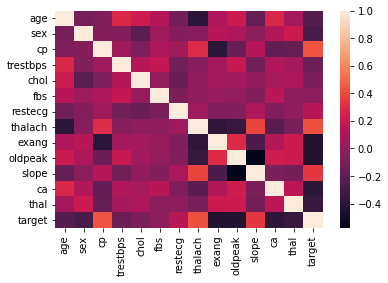

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
X=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [ ]:
y=df['target']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(y.values.reshape(-1,1)).toarray()

encoded_Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,encoded_Y, test_size=0.1, random_state=14)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train=model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 0.1477 - accuracy: 0.9963
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9853
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1186 - accuracy: 0.9816
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1133 - accuracy: 0.9816
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1091 - accuracy: 0.9779
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1061 - accuracy: 0.9779
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1031 - accuracy: 0.9779
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.1000 - accuracy: 0.9779
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.9779
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0939 - accuracy: 0.9816
Epoch 11/100
3/3 [=========

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


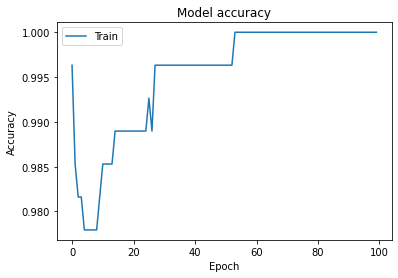

In [ ]:
plt.plot(train.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

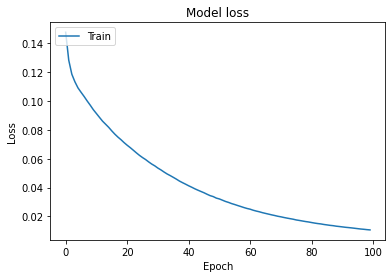

In [ ]:
plt.plot(train.history['loss'])  
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
# plt.show()